In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

In [49]:
taula = pd.read_csv('Customers.csv')

In [50]:
taula

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [51]:
taula['Profession'] = taula['Profession'].astype(str)

In [52]:
taula.dropna()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [53]:
taula.drop(taula[taula['Profession'] == 'nan'].index, inplace = True)

In [54]:
taula.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [55]:
taula.columns = ['ID', 'Genere', 'Edat', 'IngresosAnuals', 'Puntuacio', 'Professio', 'ExperienciaLaboral', 'NumFamiliar']

In [56]:
taula.head()

,ID,Genere,Edat,IngresosAnuals,Puntuacio,Professio,ExperienciaLaboral,NumFamiliar
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [57]:
#1. Mostrar quins són els clients amb el seu numero de familiars que tenen un ranking més alt dels ingresos de la nostra tenda 
# en base a la professió que tenen.

In [58]:
dades_agrupades = taula.groupby('Professio').apply(lambda x: x.sort_values('IngresosAnuals', ascending=False))

In [59]:
clients_top = dades_agrupades.groupby('ID').head()

In [60]:
clients_top[['ID', 'NumFamiliar', 'IngresosAnuals', 'Professio']]

ID  NumFamiliar  IngresosAnuals  Professio
Professio                                                   
Artist    1825  1826            6          189709     Artist
          1165  1166            1          189498     Artist
          658    659            6          189446     Artist
          921    922            6          189091     Artist
          652    653            3          189072     Artist
...              ...          ...             ...        ...
Marketing 138    139            4           22000  Marketing
          54      55            1           18000  Marketing
          212    213            4           12000  Marketing
          155    156            4           10000  Marketing
          288    289            1            5000  Marketing

[1965 rows x 4 columns]

In [61]:
# 2. Mostrar una gràfica de barres la mitJana dels ingressos de l’empresa segons la professio.

In [62]:
dades_agrupades

ID  Genere  Edat  IngresosAnuals  Puntuacio  Professio  \
Professio                                                                  
Artist    1825  1826    Male     7          189709         18     Artist   
          1165  1166    Male    19          189498         18     Artist   
          658    659  Female    31          189446         38     Artist   
          921    922    Male    52          189091         12     Artist   
          652    653  Female    16          189072         86     Artist   
...              ...     ...   ...             ...        ...        ...   
Marketing 138    139    Male    19           22000         10  Marketing   
          54      55  Female    50           18000         45  Marketing   
          212    213    Male    86           12000         70  Marketing   
          155    156  Female    27           10000         89  Marketing   
          288    289  Female    21            5000         91  Marketing   

                ExperienciaLaboral  NumFamiliar  
Professio                                        
Artist    1825                   6            6  
          1165                   4            1  
          658                    1            6  
          921                    0            6  
          652                    6            3  
...                            ...          ...  
Marketing 138                    8            4  
          54                     1            1  
          212                    2            4  
          155                    8            4  
          288                    0            1  

[1965 rows x 8 columns]

In [63]:
promigIngresosPerProfesio = clients_top[['IngresosAnuals']].groupby('Professio').mean()

In [64]:
professions = taula['Professio'].tolist()

professions.sort()

professions = list(dict.fromkeys(professions))

#diccionari = dict(list(map(lambda x: (x,None), professions)))

#llista_claus = sorted(diccionari.keys(), key=lambda x:x.lower())

#diccionari

#llista_claus

professions

['Artist',
 'Doctor',
 'Engineer',
 'Entertainment',
 'Executive',
 'Healthcare',
 'Homemaker',
 'Lawyer',
 'Marketing']

In [65]:
promigIngresosPerProfesio['Professio'] = professions

In [66]:
promigIngresosPerProfesio

,IngresosAnuals,Professio
Professio,,
Artist,108776.580065,Artist
Doctor,111573.217391,Doctor
Engineer,111161.240223,Engineer
Entertainment,110650.333333,Entertainment
Executive,113770.130719,Executive
Healthcare,112574.041298,Healthcare
Homemaker,108758.616667,Homemaker
Lawyer,110995.838028,Lawyer
Marketing,107994.211765,Marketing


In [67]:
promigIngresosPerProfesio["Professio"]

Professio
Artist                  Artist
Doctor                  Doctor
Engineer              Engineer
Entertainment    Entertainment
Executive            Executive
Healthcare          Healthcare
Homemaker            Homemaker
Lawyer                  Lawyer
Marketing            Marketing
Name: Professio, dtype: object

In [68]:
promigIngresosPerProfesio["Professio"].astype(str)
promigIngresosPerProfesio["Professio"].str.replace(' ', '')

Professio
Artist                  Artist
Doctor                  Doctor
Engineer              Engineer
Entertainment    Entertainment
Executive            Executive
Healthcare          Healthcare
Homemaker            Homemaker
Lawyer                  Lawyer
Marketing            Marketing
Name: Professio, dtype: object

In [69]:
promigIngresosPerProfesio["IngresosAnuals"]

Professio
Artist           108776.580065
Doctor           111573.217391
Engineer         111161.240223
Entertainment    110650.333333
Executive        113770.130719
Healthcare       112574.041298
Homemaker        108758.616667
Lawyer           110995.838028
Marketing        107994.211765
Name: IngresosAnuals, dtype: float64

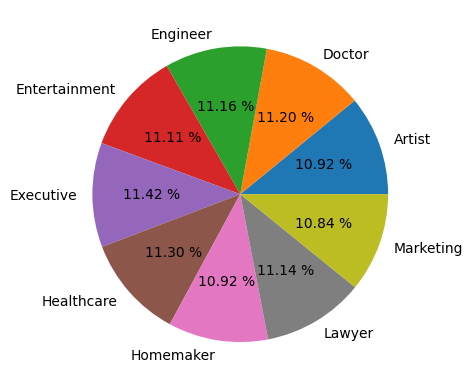

In [70]:
plt.pie(promigIngresosPerProfesio["IngresosAnuals"], labels=promigIngresosPerProfesio["Professio"], autopct="%0.2f %%")
plt.show()

In [71]:
def valorIngresos(valor):
    x = int(round(valor/100*promigIngresosPerProfesio["IngresosAnuals"].sum(), 0))
    return x

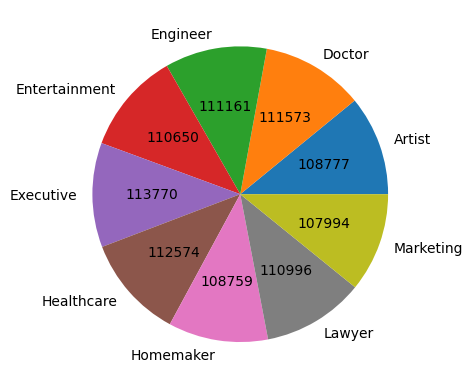

In [72]:
plt.pie(promigIngresosPerProfesio["IngresosAnuals"], labels=promigIngresosPerProfesio["Professio"], autopct=valorIngresos)
plt.show()

In [73]:
promigIngresosPerProfesio

,IngresosAnuals,Professio
Professio,,
Artist,108776.580065,Artist
Doctor,111573.217391,Doctor
Engineer,111161.240223,Engineer
Entertainment,110650.333333,Entertainment
Executive,113770.130719,Executive
Healthcare,112574.041298,Healthcare
Homemaker,108758.616667,Homemaker
Lawyer,110995.838028,Lawyer
Marketing,107994.211765,Marketing


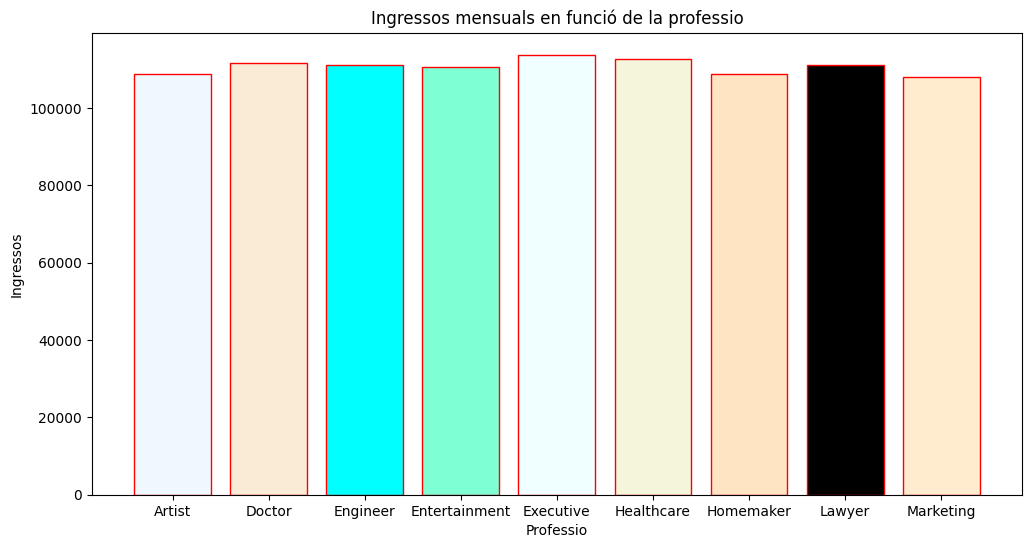

In [74]:
#ingressos = promigIngresosPerProfesio["Professio"].tolist()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(promigIngresosPerProfesio["Professio"],promigIngresosPerProfesio["IngresosAnuals"], color=mcolors.CSS4_COLORS, edgecolor='red')
#promigIngresosPerProfesio.plot(kind='bar', y='IngresosAnuals', x='Professio')
ax.set(title = "Ingressos mensuals en funció de la professio",
       xlabel = "Professio",
       ylabel = "Ingressos")
plt.show()

In [75]:
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

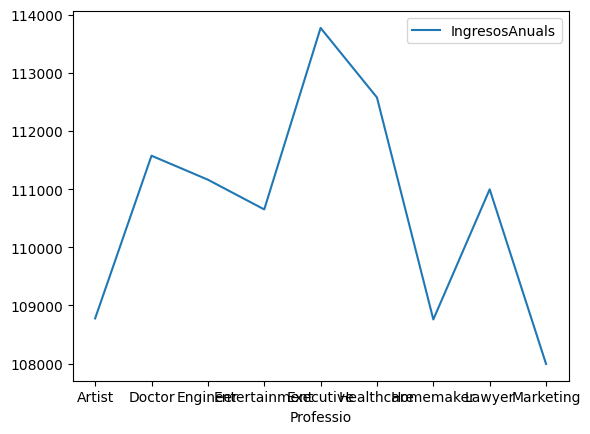

In [76]:
#ingressos = promigIngresosPerProfesio["Professio"].tolist()
promigIngresosPerProfesio.plot(y='IngresosAnuals', x='Professio')
plt.show()

In [77]:
#7. Mostrar una gràfica circular sobre el promig d’ingresos de cada professió.

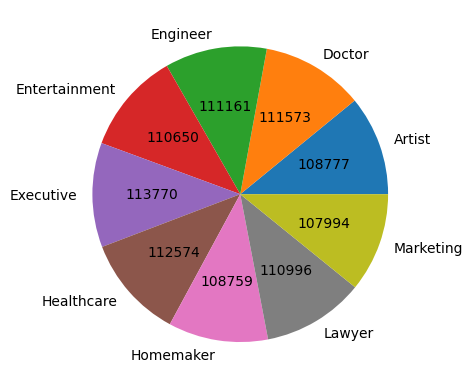

In [78]:
plt.pie(promigIngresosPerProfesio["IngresosAnuals"], labels=promigIngresosPerProfesio["Professio"], autopct=valorIngresos)
plt.show()


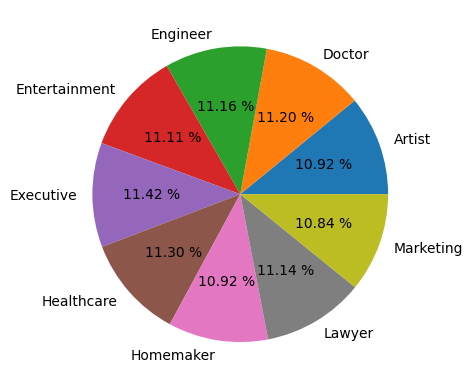

In [79]:
plt.pie(promigIngresosPerProfesio["IngresosAnuals"], labels=promigIngresosPerProfesio["Professio"], autopct="%0.2f %%")
plt.show()

In [80]:
#3. Mostrar el sexe i l’edat dels clients que han obtingut una puntuació de compra més elevada de 50.

In [97]:
puntuacio = taula[['Genere', 'Edat', 'Puntuacio']]

In [98]:
puntuacio[puntuacio['Puntuacio']>50].head()

,Genere,Edat,Puntuacio
1,Male,21,81
3,Female,23,77
5,Female,22,76
7,Female,23,94
9,Female,30,72


In [99]:
#4. Mostrar el sexe, l’edat, i la professió dels 5 clients amb la puntuació de compra més baixa.

In [138]:
puntuacioMesBaxa = taula[['Genere', 'Edat', 'Puntuacio', 'Professio']]

In [139]:
print(puntuacioMesBaxa.loc[puntuacioMesBaxa['Puntuacio'] == min(puntuacioMesBaxa['Puntuacio'])].head())

     Genere  Edat  Puntuacio Professio
202  Female    16          0  Engineer
249  Female    89          0  Engineer


In [ ]:
#5.Mostrar relacioni de la situació familiar dels client amb la professió a la qual es dedica i mostri la mitjana de familiars 
#per grup professional.

In [173]:
situacioFamiliar = taula[['NumFamiliar', 'Professio']]
mitjanaFamiliarsProfessio = situacioFamiliar.groupby('Professio').mean().round(2)
print(mitjanaFamiliarsProfessio)

               NumFamiliar
Professio                 
Artist                3.65
Doctor                3.67
Engineer              3.58
Entertainment         3.89
Executive             3.97
Healthcare            3.91
Homemaker             4.05
Lawyer                3.62
Marketing             3.73


In [174]:
#6. Mostrar el l’identificador, el gènere, la professió i l’experiència del client que tinguin una experiència laboral 
#diferent a zero. 

In [177]:
experienciaLaboral = taula[['ID', 'Genere', 'ExperienciaLaboral']]

In [184]:
experienciaLaboralDiferentZero = experienciaLaboral[experienciaLaboral['ExperienciaLaboral'] > 0]

In [185]:
experienciaLaboralDiferentZero.head()

,ID,Genere,ExperienciaLaboral
0,1,Male,1
1,2,Male,3
2,3,Female,1
4,5,Female,2
6,7,Female,1


In [186]:
#9. Mostrar el total d'ingressos que té l’empresa.

In [217]:
ingresosAnuals = taula['IngresosAnuals']

In [221]:
sumaIngresosAnuals = ingresosAnuals.sum()

In [236]:
mensatge = 'Total ingresos anuals:'
print(mensatge) 
print(sumaIngresosAnuals)

Total ingresos anuals:
217360459


In [ ]:
#8. Mostrar el totals d’ingresos anuals de cada professió. 

In [250]:
ingresosAnualsSenseAgrupar = taula[['IngresosAnuals', 'Professio']].groupby('Professio')


In [252]:
sumaIngresosAnualsAgrupat = ingresosAnualsSenseAgrupar.sum()

In [256]:
sumaIngresosAnualsAgrupat.head()

,IngresosAnuals
Professio,
Artist,66571267
Doctor,17963288
Engineer,19897862
Entertainment,25892178
Executive,17406830
